In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [83]:
data=pd.read_csv("employee.csv")
data.head(2)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  

[2 rows x 35 columns]

In [84]:
names = data.columns.values 
print(names)

['Age' 'Attrition' 'BusinessTravel' 'DailyRate' 'Department'
 'DistanceFromHome' 'Education' 'EducationField' 'EmployeeCount'
 'EmployeeNumber' 'EnvironmentSatisfaction' 'Gender' 'HourlyRate'
 'JobInvolvement' 'JobLevel' 'JobRole' 'JobSatisfaction' 'MaritalStatus'
 'MonthlyIncome' 'MonthlyRate' 'NumCompaniesWorked' 'Over18' 'OverTime'
 'PercentSalaryHike' 'PerformanceRating' 'RelationshipSatisfaction'
 'StandardHours' 'StockOptionLevel' 'TotalWorkingYears'
 'TrainingTimesLastYear' 'WorkLifeBalance' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager']


In [85]:
data.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [87]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [88]:
data.drop(0,inplace=True)
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [89]:
data.corr()

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010438         -0.001380   0.208375   
DailyRate                 0.010438   1.000000         -0.004477  -0.016363   
DistanceFromHome         -0.001380  -0.004477          1.000000   0.020441   
Education                 0.208375  -0.016363          0.020441   1.000000   
EmployeeCount                  NaN        NaN               NaN        NaN   
EmployeeNumber           -0.009639  -0.050189          0.031788   0.041089   
EnvironmentSatisfaction   0.010349   0.018695         -0.016538  -0.027541   
HourlyRate                0.023883   0.022701          0.032114   0.017631   
JobInvolvement            0.029708   0.045954          0.009048   0.042682   
JobLevel                  0.509657   0.002996          0.005265   0.101581   
JobSatisfaction          -0.005245   0.030007         -0.002878  -0.010604   
MonthlyIncome             0.497923   0.007763         -0.017095   0.094921   
MonthlyRate               0.027837  -0.032561          0.027987  -0.025655   
NumCompaniesWorked        0.299470   0.037143         -0.027841   0.127838   
PercentSalaryHike         0.003985   0.023300          0.039475  -0.011818   
PerformanceRating         0.002034   0.000689          0.026827  -0.024806   
RelationshipSatisfaction  0.054066   0.008656          0.005474  -0.010091   
StandardHours                  NaN        NaN               NaN        NaN   
StockOptionLevel          0.037807   0.042635          0.044259   0.017867   
TotalWorkingYears         0.680596   0.014732          0.004340   0.148073   
TrainingTimesLastYear    -0.018993   0.003557         -0.038512  -0.026468   
WorkLifeBalance          -0.020778  -0.036672         -0.028342   0.008325   
YearsAtCompany            0.311383  -0.033978          0.009398   0.069033   
YearsInCurrentRole        0.212935   0.009966          0.018808   0.060214   
YearsSinceLastPromotion   0.216768  -0.032897          0.009566   0.053865   
YearsWithCurrManager      0.202032  -0.026493          0.014581   0.069235   

                          EmployeeCount  EmployeeNumber  \
Age                                 NaN       -0.009639   
DailyRate                           NaN       -0.050189   
DistanceFromHome                    NaN        0.031788   
Education                           NaN        0.041089   
EmployeeCount                       NaN             NaN   
EmployeeNumber                      NaN        1.000000   
EnvironmentSatisfaction             NaN        0.016875   
HourlyRate                          NaN        0.036841   
JobInvolvement                      NaN       -0.006455   
JobLevel                            NaN       -0.018604   
JobSatisfaction                     NaN       -0.044976   
MonthlyIncome                       NaN       -0.014969   
MonthlyRate                         NaN        0.013505   
NumCompaniesWorked                  NaN        0.001213   
PercentSalaryHike                   NaN       -0.014297   
PerformanceRating                   NaN       -0.020874   
RelationshipSatisfaction            NaN       -0.071828   
StandardHours                       NaN             NaN   
StockOptionLevel                    NaN        0.061226   
TotalWorkingYears                   NaN       -0.014869   
TrainingTimesLastYear               NaN        0.021143   
WorkLifeBalance                     NaN        0.007444   
YearsAtCompany                      NaN       -0.011442   
YearsInCurrentRole                  NaN       -0.008498   
YearsSinceLastPromotion             NaN       -0.009817   
YearsWithCurrManager                NaN       -0.008921   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010349    0.023883        0.029708   
DailyRate                                0.018695    0.022701        0.045954   
DistanceFromHome                        -0.016538    0.032114        0.009048   
Educat

In [91]:
data['Attrition'].value_counts()

No     1233
Yes     236
Name: Attrition, dtype: int64

In [92]:
data['Attrition'].replace('Yes',1, inplace=True)
data['Attrition'].replace('No',0, inplace=True)

In [93]:
data['Attrition'].value_counts()

0    1233
1     236
Name: Attrition, dtype: int64

In [94]:
data.head(4)

Age  Attrition     BusinessTravel  DailyRate              Department  \
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[4 rows x 35 columns]

In [95]:
data['BusinessTravel'].replace('Travel_Rarely',1, inplace=True)
data['BusinessTravel'].replace('Travel_Frequently',2, inplace=True)
data['BusinessTravel'].replace('Non-Travel',3, inplace=True)

In [96]:
data['BusinessTravel'].value_counts()

1    1042
2     277
3     150
Name: BusinessTravel, dtype: int64

In [97]:
data['Gender'].replace('Male',1, inplace=True)
data['Gender'].replace('Female',0, inplace=True)
data['Gender']

1       1
2       1
3       0
4       1
5       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: Gender, Length: 1469, dtype: int64

In [98]:
data.dtypes

Age                          int64
Attrition                    int64
BusinessTravel               int64
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                       int64
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [99]:
X=data.select_dtypes(include=['int64'])
X.dtypes
X.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'Education', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [100]:
data.drop("Department",axis=1,inplace=True)
data.drop("EducationField",axis=1,inplace=True)
data.drop("JobRole",axis=1,inplace=True)
data.drop("MaritalStatus",axis=1,inplace=True)
data.drop("Over18",axis=1,inplace=True)
data.drop("OverTime",axis=1,inplace=True)

In [101]:
data.head()

Age  Attrition  BusinessTravel  DailyRate  DistanceFromHome  Education  \
1   49          0               2        279                 8          1   
2   37          1               1       1373                 2          2   
3   33          0               2       1392                 3          4   
4   27          0               1        591                 2          1   
5   32          0               2       1005                 2          2   

   EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender  ...  \
1              1               2                        3       1  ...   
2              1               4                        4       1  ...   
3              1               5                        4       0  ...   
4              1               7                        1       1  ...   
5              1               8                        4       1  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
1                         4             80                 1   
2                         2             80                 0   
3                         3             80                 0   
4                         4             80                 1   
5                         3             80                 0   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   
5                  8                      2                2               7   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  
5                   7                        3                     6  

[5 rows x 29 columns]

C:\Users\varshashetty\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

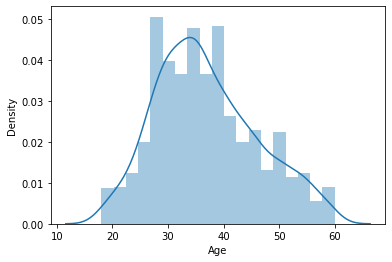

In [131]:
sns.distplot(data.Age)

<AxesSubplot:xlabel='Age', ylabel='Count'>

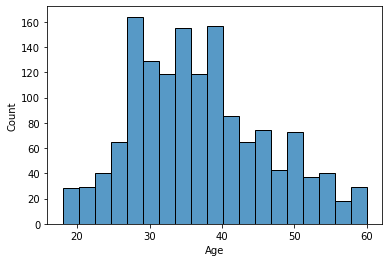

In [103]:
sns.histplot(data.Age)

<AxesSubplot:xlabel='Age'>

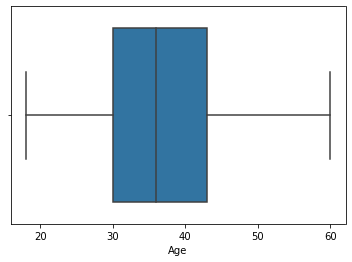

In [104]:
sns.boxplot(x=data.Age)

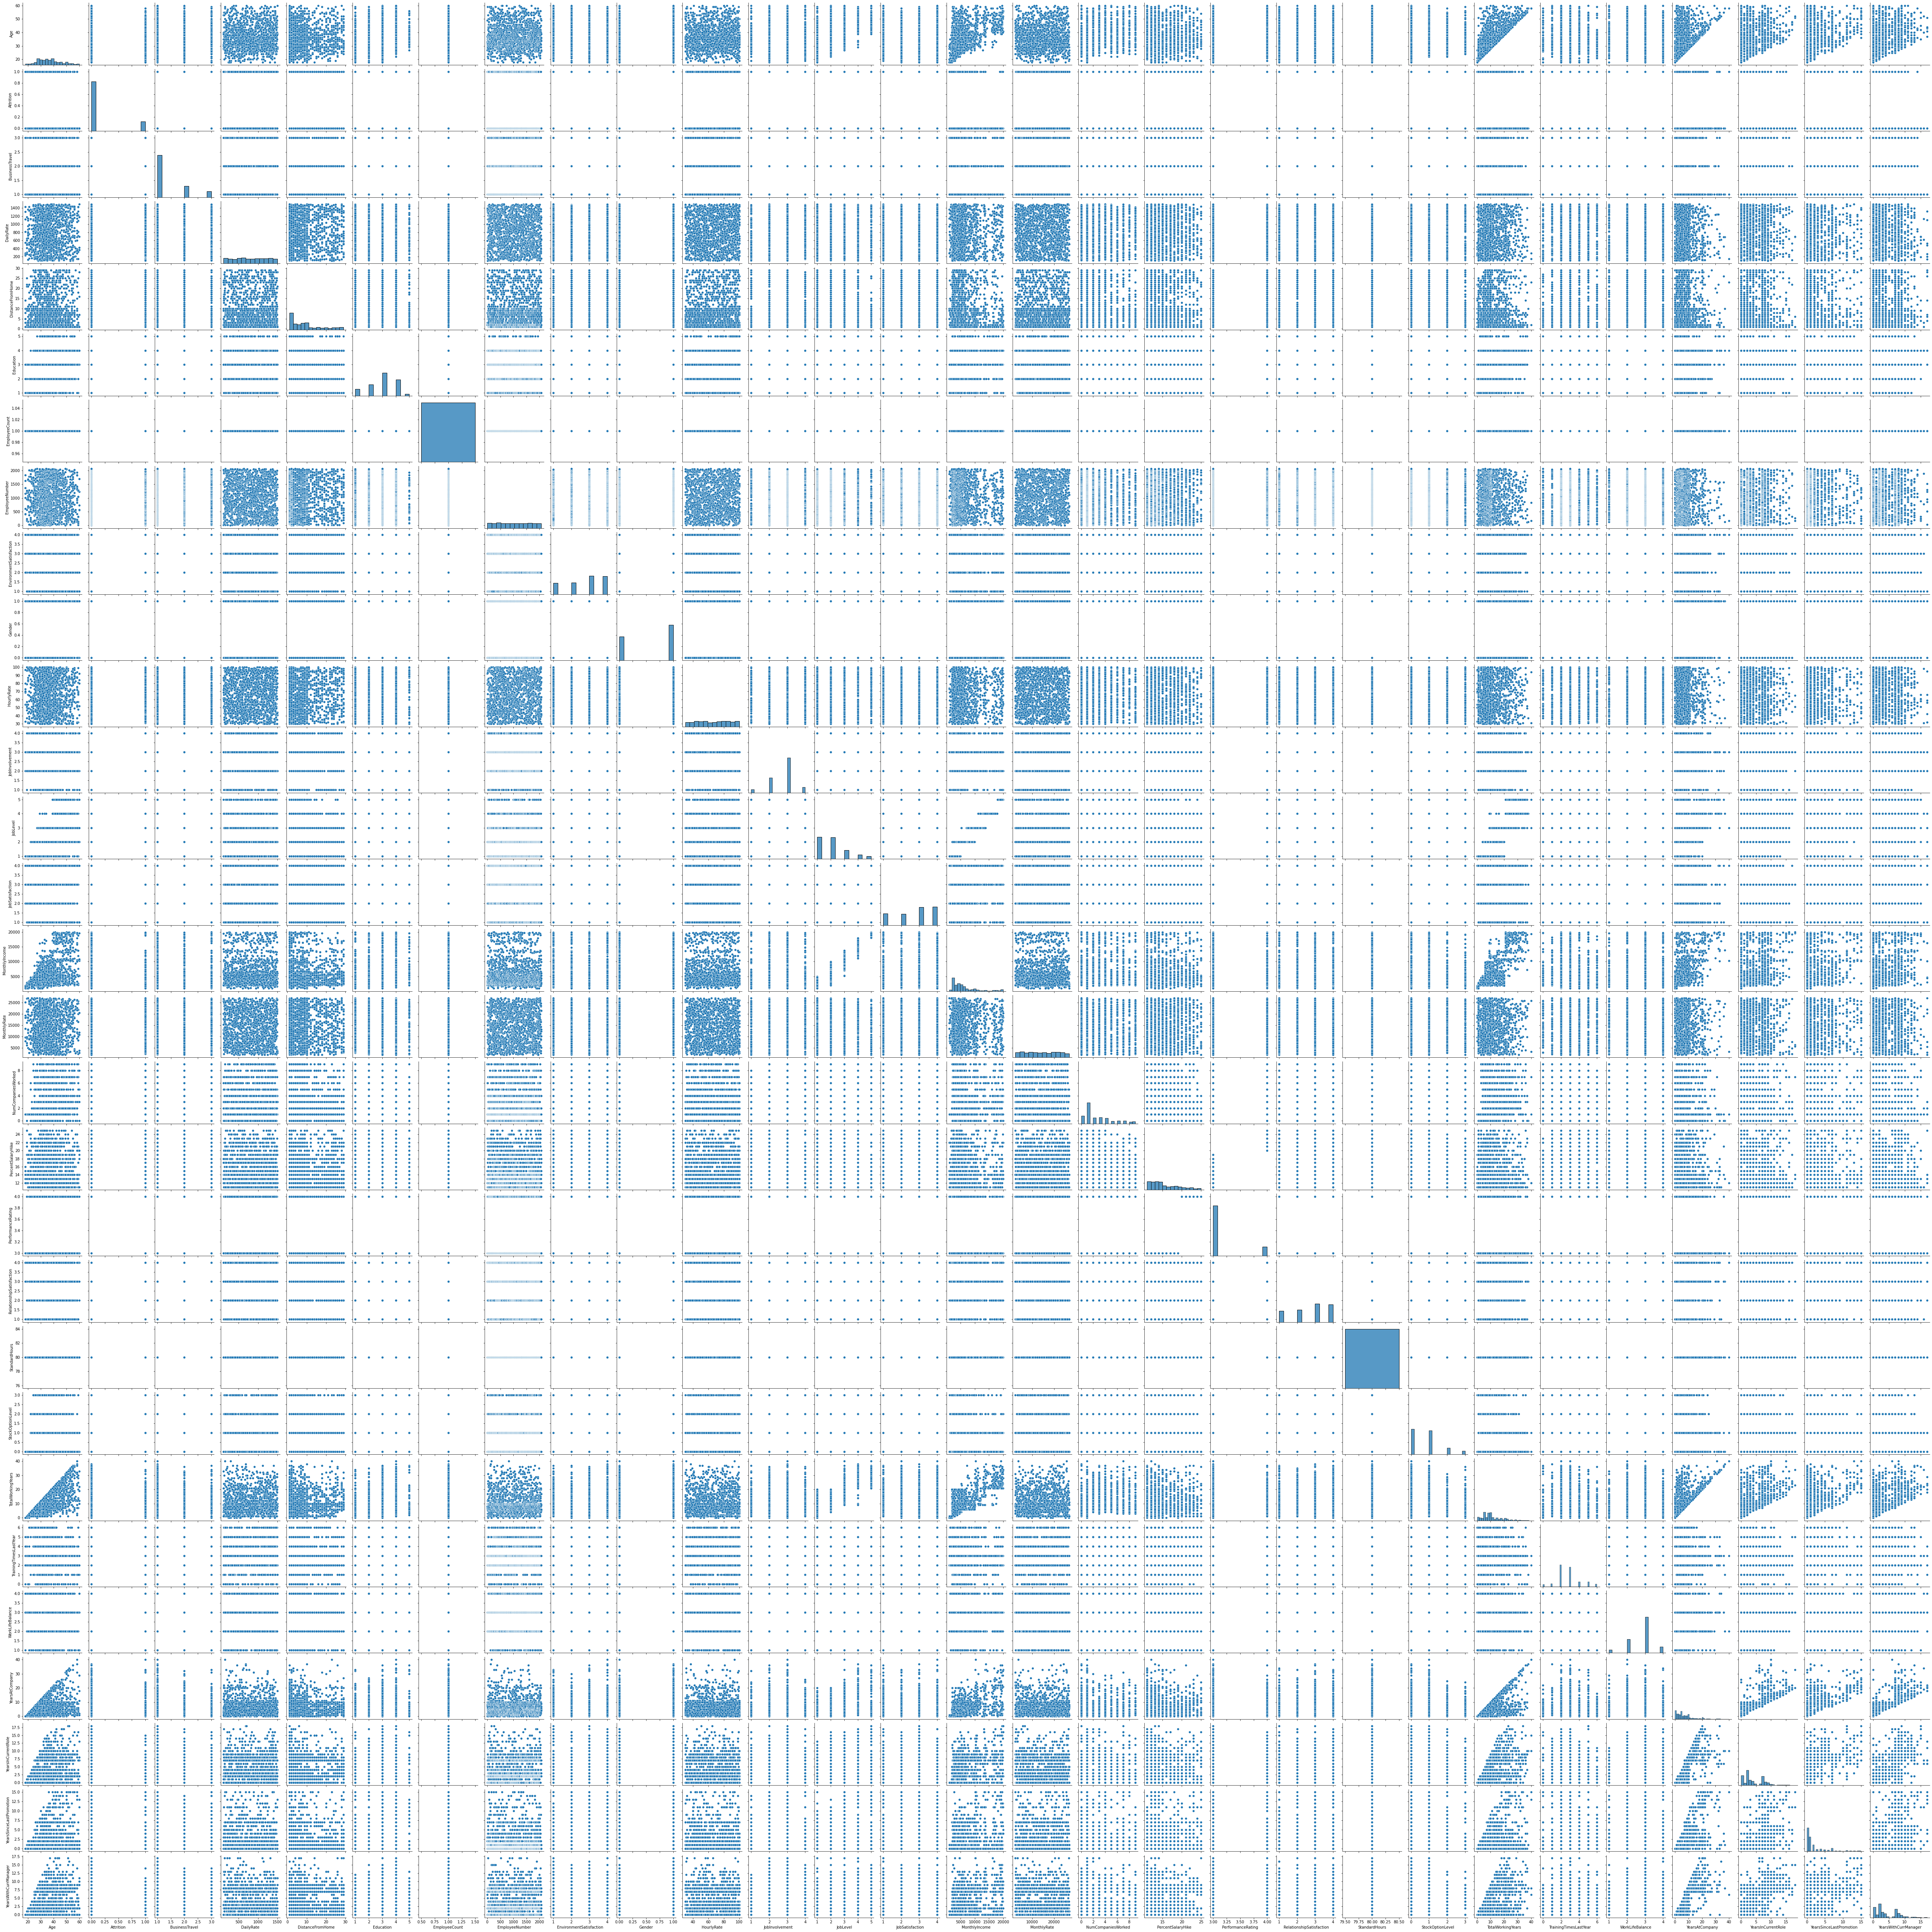

In [64]:
sns.pairplot(data)

<AxesSubplot:>

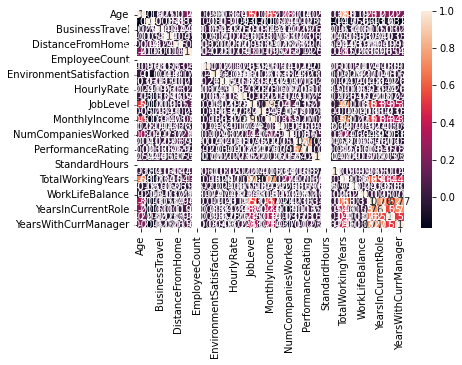

In [56]:
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

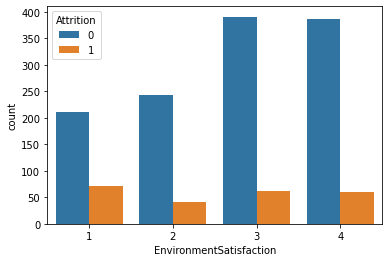

In [125]:
sns.countplot(data=data,x="EnvironmentSatisfaction",hue="Attrition")

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

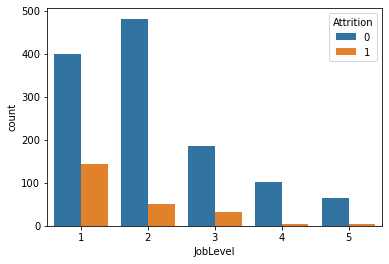

In [127]:
sns.countplot(data=data,x="JobLevel",hue="Attrition")

<AxesSubplot:xlabel='Education', ylabel='count'>

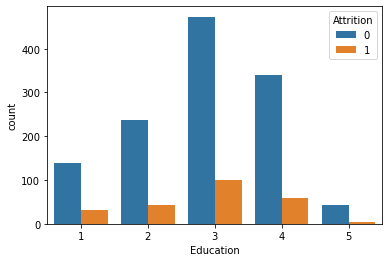

In [128]:
sns.countplot(data=data,x="Education",hue="Attrition")

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

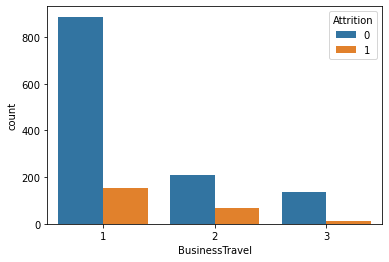

In [122]:
sns.countplot(data=data,x="BusinessTravel",hue="Attrition")

In [40]:
data = pd.DataFrame(data)
Y = data["Attrition"]
X = data.drop("Attrition",axis=1)

In [41]:
from sklearn.model_selection import train_test_split
x1,x2,y1,y2=train_test_split(X,Y,test_size=0.15,shuffle=False)

In [42]:
LR_model = LogisticRegression()
LR_model.fit(x1,y1)

C:\Users\varshashetty\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
yp = LR_model.predict(x2)

In [45]:
LR_model.score(x2,y2)

0.8506787330316742